# STOCK PRICE PREDICTION

In [1]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [2]:
#importing the library

In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import math
from sklearn.linear_model import LinearRegression

Data Preprocessing/Collection

In [5]:
import yfinance as yahoofinance
startDate=datetime.datetime(2018,2,18)
endDate=datetime.datetime(2023,2,15)
GetTataInformation=yahoofinance.Ticker('TATAMOTORS.NS')
data=round(GetTataInformation.history(start=startDate,end=endDate),2)
index_as_datetime=pd.to_datetime(data.index)
data.index=index_as_datetime.date
data.index.names=['Date']

In [6]:
#printing first 10 records of the dataset

In [7]:
data.head(10)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2018-02-19,373.70,374.70,362.80,368.75,5658765,0.0,0.0
2018-02-20,370.35,370.90,366.50,369.30,3972114,0.0,0.0
2018-02-21,372.50,372.50,362.85,364.45,8640166,0.0,0.0
2018-02-22,363.00,363.00,357.50,358.50,10870704,0.0,0.0
2018-02-23,360.10,364.60,358.75,360.20,6751064,0.0,0.0
2018-02-26,362.00,373.50,362.00,372.05,10576794,0.0,0.0
2018-02-27,375.00,376.60,370.35,372.55,6156672,0.0,0.0
2018-02-28,370.00,373.65,367.15,369.90,8009429,0.0,0.0
2018-03-01,369.75,376.30,369.05,370.75,6991806,0.0,0.0


In [8]:
#printing the shape of the data

In [9]:
data.shape

(1227, 7)

In [10]:
#printing type of data of each feature

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1227 entries, 2018-02-19 to 2023-02-03
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          1227 non-null   float64
 1   High          1227 non-null   float64
 2   Low           1227 non-null   float64
 3   Close         1227 non-null   float64
 4   Volume        1227 non-null   int64  
 5   Dividends     1227 non-null   float64
 6   Stock Splits  1227 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 76.7+ KB


Data Cleaning

In [12]:
#checking for missing values

In [13]:
data.isnull().sum()

Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

In [14]:
#so there are no missing values

data visualisation

In [15]:
#plotting how the closing price history over the years

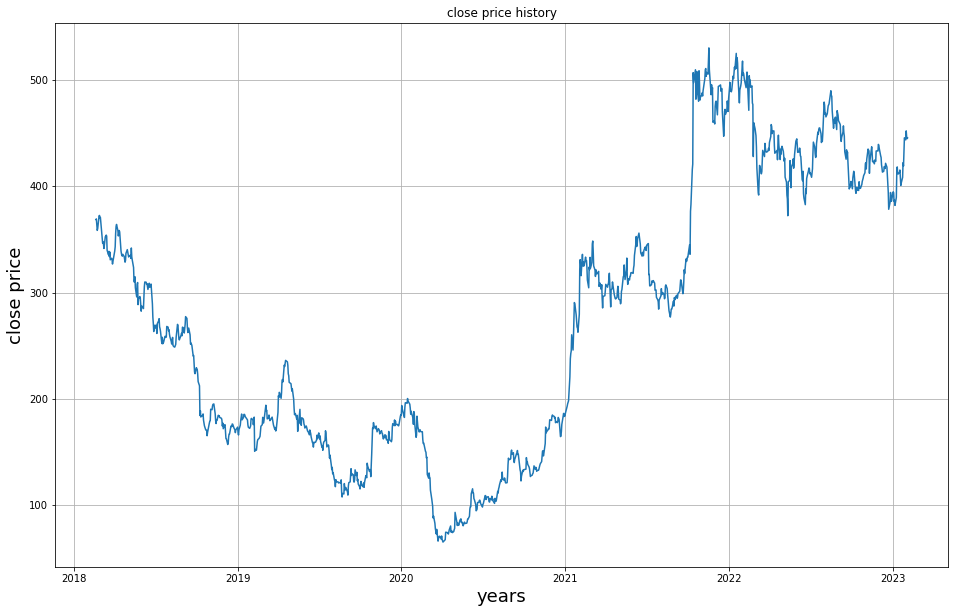

In [16]:
plt.figure(figsize=(16,10))
plt.plot(data['Close'])
plt.grid()
plt.xlabel('years',fontsize=18)
plt.ylabel('close price',fontsize=18)
plt.title('close price history')
plt.show()

In [17]:
#checking for correlation between each column

In [18]:
corr=data.corr()

<AxesSubplot:>

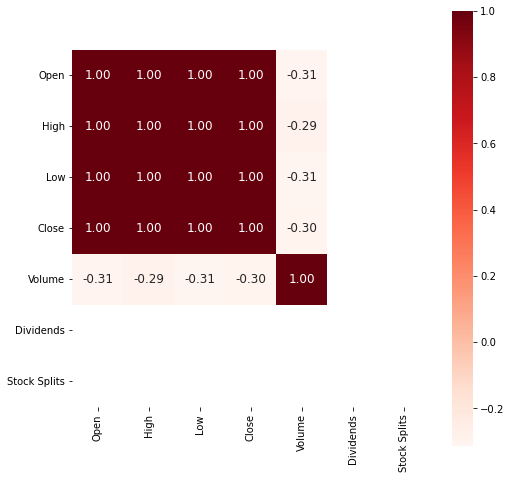

In [19]:
plt.figure(figsize=(8,8))
sns.heatmap(corr,cbar=True,square=True,annot=True,annot_kws={'size':12},fmt='0.2f',cmap='Reds')

In [20]:
#checking values of last two features

In [21]:
data[['Dividends','Stock Splits']].value_counts()

Dividends  Stock Splits
0.0        0.0             1227
dtype: int64

In [22]:
data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2018-02-19,373.70,374.7,362.80,368.75,5658765,0.0,0.0
2018-02-20,370.35,370.9,366.50,369.30,3972114,0.0,0.0
2018-02-21,372.50,372.5,362.85,364.45,8640166,0.0,0.0
2018-02-22,363.00,363.0,357.50,358.50,10870704,0.0,0.0
2018-02-23,360.10,364.6,358.75,360.20,6751064,0.0,0.0
...,...,...,...,...,...,...,...
2023-01-30,445.60,450.0,437.65,443.65,18316743,0.0,0.0
2023-01-31,443.70,454.8,440.90,452.10,25154475,0.0,0.0
2023-02-01,456.80,461.5,437.65,446.65,23798589,0.0,0.0


In [23]:
#so last features have no relation with other feature

In [24]:
#removing last two features

In [25]:
data=data.drop(['Dividends','Stock Splits'],axis=1)
data

,Open,High,Low,Close,Volume
Date,,,,,
2018-02-19,373.70,374.7,362.80,368.75,5658765
2018-02-20,370.35,370.9,366.50,369.30,3972114
2018-02-21,372.50,372.5,362.85,364.45,8640166
2018-02-22,363.00,363.0,357.50,358.50,10870704
2018-02-23,360.10,364.6,358.75,360.20,6751064
...,...,...,...,...,...
2023-01-30,445.60,450.0,437.65,443.65,18316743
2023-01-31,443.70,454.8,440.90,452.10,25154475
2023-02-01,456.80,461.5,437.65,446.65,23798589


In [26]:
data.describe()

,Open,High,Low,Close,Volume
count,1227.000000,1227.000000,1227.000000,1227.000000,1.227000e+03
mean,272.742910,277.008965,267.855542,272.102404,3.751056e+07
std,128.181558,129.430409,126.546498,127.886196,3.690374e+07
min,66.500000,66.900000,63.500000,65.300000,2.871205e+06
25%,166.725000,169.725000,163.450000,166.150000,1.443867e+07
50%,267.300000,271.000000,260.600000,266.600000,2.523673e+07
75%,395.475000,399.700000,390.275000,394.625000,4.886764e+07
max,531.450000,536.700000,520.250000,530.150000,3.905778e+08


In [27]:
#adding new columns into my data to increase the performance

In [28]:
ema9 = data['Close'].ewm(span=9, adjust=False).mean()
ema50 = data['Close'].ewm(span=50, adjust=False).mean()
ema200 = data['Close'].ewm(span=200, adjust=False).mean()

Data Visualization

In [ ]:
#plotting the graph for close history for past 5 years

Text(0.5, 1.0, 'closing price history through out 5 years with ema')

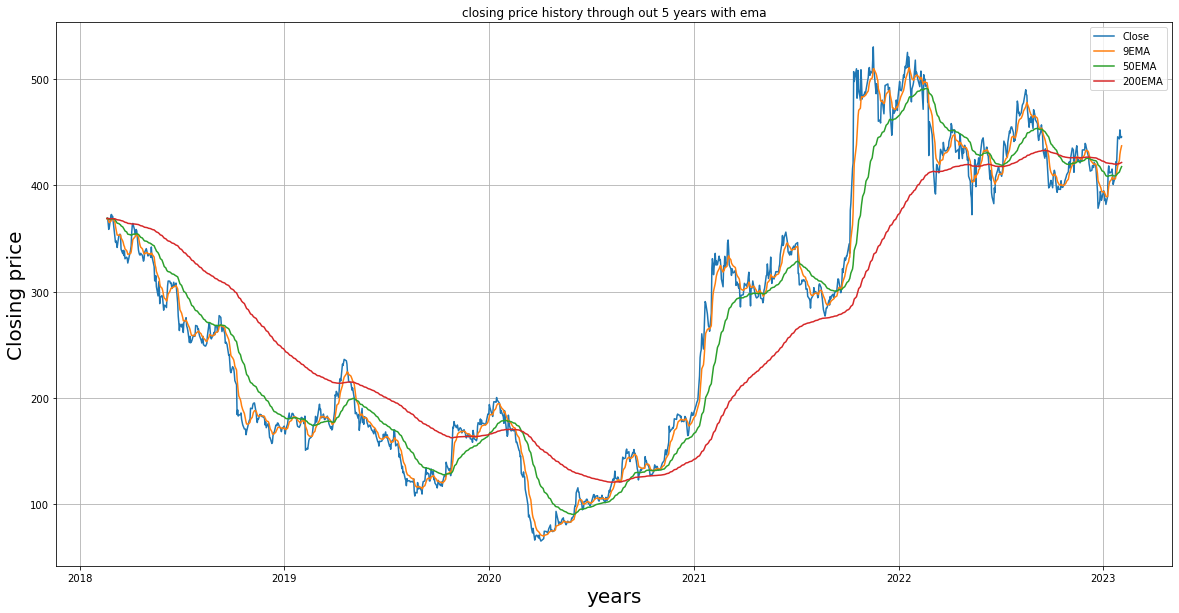

In [29]:
plt.figure(figsize=(20,10))
plt.plot(data.Close,label='Close')
plt.plot(ema9,label='9EMA')
plt.plot(ema50,label='50EMA')
plt.plot(ema200,label='200EMA')
plt.grid()
plt.legend()
plt.xlabel('years',fontsize=20)
plt.ylabel('Closing price',fontsize=20)
plt.title('closing price history through out 5 years with ema')

In [31]:
#adding moving average features into dataset to improve the performance

In [32]:
data=data.assign(EMA_9=ema9,EMA_50=ema50,EMA_200=ema200)
data

,Open,High,Low,Close,Volume,EMA_9,EMA_50,EMA_200
Date,,,,,,,,
2018-02-19,373.70,374.7,362.80,368.75,5658765,368.750000,368.750000,368.750000
2018-02-20,370.35,370.9,366.50,369.30,3972114,368.860000,368.771569,368.755473
2018-02-21,372.50,372.5,362.85,364.45,8640166,367.978000,368.602095,368.712632
2018-02-22,363.00,363.0,357.50,358.50,10870704,366.082400,368.205935,368.611014
2018-02-23,360.10,364.6,358.75,360.20,6751064,364.905920,367.891977,368.527322
...,...,...,...,...,...,...,...,...
2023-01-30,445.60,450.0,437.65,443.65,18316743,423.263733,412.401377,420.354842
2023-01-31,443.70,454.8,440.90,452.10,25154475,429.030986,413.958186,420.670714
2023-02-01,456.80,461.5,437.65,446.65,23798589,432.554789,415.240218,420.929214




EDA-Exploratory data analysis



In [33]:
#seperating training and testing dataset

In [34]:
X=data.drop('Close',axis=1)
Y=data['Close']

In [35]:
X

,Open,High,Low,Volume,EMA_9,EMA_50,EMA_200
Date,,,,,,,
2018-02-19,373.70,374.7,362.80,5658765,368.750000,368.750000,368.750000
2018-02-20,370.35,370.9,366.50,3972114,368.860000,368.771569,368.755473
2018-02-21,372.50,372.5,362.85,8640166,367.978000,368.602095,368.712632
2018-02-22,363.00,363.0,357.50,10870704,366.082400,368.205935,368.611014
2018-02-23,360.10,364.6,358.75,6751064,364.905920,367.891977,368.527322
...,...,...,...,...,...,...,...
2023-01-30,445.60,450.0,437.65,18316743,423.263733,412.401377,420.354842
2023-01-31,443.70,454.8,440.90,25154475,429.030986,413.958186,420.670714
2023-02-01,456.80,461.5,437.65,23798589,432.554789,415.240218,420.929214


In [36]:
Y

Date
2018-02-19    368.75
2018-02-20    369.30
2018-02-21    364.45
2018-02-22    358.50
2018-02-23    360.20
               ...  
2023-01-30    443.65
2023-01-31    452.10
2023-02-01    446.65
2023-02-02    444.80
2023-02-03    445.45
Name: Close, Length: 1227, dtype: float64

In [37]:
#shifting rows by one postion upward

In [38]:
days_shifted=1
yy=Y.shift(periods=-days_shifted)
y = yy.dropna(axis=0)
X = X.iloc[:len(y), :]

In [39]:
#printing dependent and independent variable

In [40]:
X

,Open,High,Low,Volume,EMA_9,EMA_50,EMA_200
Date,,,,,,,
2018-02-19,373.70,374.7,362.80,5658765,368.750000,368.750000,368.750000
2018-02-20,370.35,370.9,366.50,3972114,368.860000,368.771569,368.755473
2018-02-21,372.50,372.5,362.85,8640166,367.978000,368.602095,368.712632
2018-02-22,363.00,363.0,357.50,10870704,366.082400,368.205935,368.611014
2018-02-23,360.10,364.6,358.75,6751064,364.905920,367.891977,368.527322
...,...,...,...,...,...,...,...
2023-01-27,438.00,453.4,435.15,63360467,418.167166,411.125923,420.120719
2023-01-30,445.60,450.0,437.65,18316743,423.263733,412.401377,420.354842
2023-01-31,443.70,454.8,440.90,25154475,429.030986,413.958186,420.670714


In [41]:
y

Date
2018-02-19    369.30
2018-02-20    364.45
2018-02-21    358.50
2018-02-22    360.20
2018-02-23    372.05
               ...  
2023-01-27    443.65
2023-01-30    452.10
2023-01-31    446.65
2023-02-01    444.80
2023-02-02    445.45
Name: Close, Length: 1226, dtype: float64

Splitting The Data

In [42]:
#splitting the X and Y into 75% training dataset and 25% testing dataset

In [43]:
#calculating the 75% data from total dataset

In [44]:
len_of_training_dataset=math.ceil(len(data)*0.75)
print('lenght of my training dataset is:',len_of_training_dataset)

lenght of my training dataset is: 921


In [45]:
#training dataset should be of length :859

In [46]:
X_train = X.iloc[:len_of_training_dataset,:]
y_train=y.iloc[:len_of_training_dataset]
X_test=X.iloc[len_of_training_dataset:,:]
y_test=y.iloc[len_of_training_dataset:]

In [47]:
#printing x_train,y_train,x_test,y_test and the shape od the data

In [48]:
X_train

,Open,High,Low,Volume,EMA_9,EMA_50,EMA_200
Date,,,,,,,
2018-02-19,373.70,374.70,362.80,5658765,368.750000,368.750000,368.750000
2018-02-20,370.35,370.90,366.50,3972114,368.860000,368.771569,368.755473
2018-02-21,372.50,372.50,362.85,8640166,367.978000,368.602095,368.712632
2018-02-22,363.00,363.00,357.50,10870704,366.082400,368.205935,368.611014
2018-02-23,360.10,364.60,358.75,6751064,364.905920,367.891977,368.527322
...,...,...,...,...,...,...,...
2021-11-08,493.90,504.85,490.25,31736426,488.725838,407.712503,320.651698
2021-11-09,505.00,520.65,503.50,50458762,492.910670,411.710052,322.532279
2021-11-10,506.25,515.95,500.20,26615777,496.478536,415.593972,324.405092


In [49]:
y_train

Date
2018-02-19    369.30
2018-02-20    364.45
2018-02-21    358.50
2018-02-22    360.20
2018-02-23    372.05
               ...  
2021-11-08    509.65
2021-11-09    510.75
2021-11-10    503.45
2021-11-11    507.05
2021-11-12    505.45
Name: Close, Length: 921, dtype: float64

In [50]:
X_test

,Open,High,Low,Volume,EMA_9,EMA_50,EMA_200
Date,,,,,,,
2021-11-15,506.25,514.90,504.50,18014977,500.856611,425.744012,329.752077
2021-11-16,506.90,526.85,506.20,55897781,504.495288,429.403070,331.635638
2021-11-17,520.25,536.70,520.25,48463415,509.626231,433.353930,333.610906
2021-11-18,531.45,534.20,501.30,47197742,509.640985,436.347893,335.363036
2021-11-22,512.25,512.25,478.40,40044849,504.932788,438.298956,336.862906
...,...,...,...,...,...,...,...
2023-01-27,438.00,453.40,435.15,63360467,418.167166,411.125923,420.120719
2023-01-30,445.60,450.00,437.65,18316743,423.263733,412.401377,420.354842
2023-01-31,443.70,454.80,440.90,25154475,429.030986,413.958186,420.670714


In [51]:
y_test

Date
2021-11-15    519.05
2021-11-16    530.15
2021-11-17    509.70
2021-11-18    486.10
2021-11-22    495.50
               ...  
2023-01-27    443.65
2023-01-30    452.10
2023-01-31    446.65
2023-02-01    444.80
2023-02-02    445.45
Name: Close, Length: 305, dtype: float64

In [52]:
#printing the shape of x_train,x_test,y_train,y_test

In [53]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(921, 7) (305, 7) (921,) (305,)


Building the Model

In [54]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [55]:
# evaluating test model
y_predict=model.predict(X_test)

In [56]:
y_predict

array([510.82185745, 521.61606133, 532.34103698, 514.5774238 ,
       490.85735581, 491.03841574, 491.42953407, 489.85305198,
       468.17382056, 458.54264337, 467.7985801 , 472.04202413,
       473.36550564, 479.96817373, 470.26106377, 477.96698565,
       491.34652578, 491.04632612, 492.39679722, 499.90501716,
       484.35635314, 493.47950035, 489.33073581, 474.7457579 ,
       445.75747492, 455.62493074, 467.49179418, 472.04167486,
       463.61473653, 465.5784378 , 477.43328253, 475.82177301,
       470.76444044, 478.83815337, 495.98817867, 488.53800921,
       487.15294422, 486.10732079, 488.30144084, 499.37823734,
       501.57461794, 506.78908912, 504.33832983, 509.75419618,
       520.74431835, 513.74727465, 514.71273028, 515.24467727,
       501.24944669, 485.73465321, 483.53935272, 494.43707914,
       502.08606466, 511.08070634, 501.95988842, 508.5674552 ,
       506.90310579, 501.34710971, 495.03308944, 484.43387023,
       498.48846926, 505.27767773, 499.67673464, 474.60

In [57]:
yt=pd.Series(y_predict)
ema9test = yt.ewm(span=9, adjust=False).mean()
ema50test = yt.ewm(span=50, adjust=False).mean()
ema200test = yt.ewm(span=200, adjust=False).mean()

In [58]:
#printing the shape

In [59]:
y_predict.shape

(305,)

In [60]:
# evaluating train model
z_predict=model.predict(X_train)
z_predict

array([365.64082113, 365.83826513, 364.21576924, 356.98077617,
       360.41950653, 369.23896029, 370.96008291, 368.74853343,
       372.2787184 , 355.36435788, 349.01275492, 350.09183841,
       343.37829982, 342.38132749, 347.22701276, 351.63428348,
       350.7753501 , 353.36499901, 341.91207508, 334.18848779,
       335.80694331, 334.76067679, 335.00905514, 331.04124892,
       327.81630349, 330.49221695, 326.8928356 , 335.88947511,
       340.19245266, 358.36127149, 366.60778497, 361.64273928,
       362.26290457, 354.29345102, 351.58949095, 360.23610664,
       355.89969439, 342.2148147 , 335.63740869, 334.03368185,
       331.84163196, 338.74061969, 334.57086276, 329.74281312,
       329.06562997, 330.10305828, 333.15304842, 338.74302482,
       340.541278  , 329.47865352, 331.69372222, 332.7520284 ,
       330.36096415, 342.43868484, 334.7796012 , 328.95772664,
       324.5965202 , 310.90520046, 310.35045982, 313.75778327,
       305.79248392, 298.38828933, 307.68010494, 310.41

In [61]:
z_predict.shape

(921,)

In [62]:
z=pd.Series(z_predict)
ema9train = z.ewm(span=9, adjust=False).mean()
ema50train = z.ewm(span=50, adjust=False).mean()
ema200train = z.ewm(span=200, adjust=False).mean()

In [63]:
#printing precision measurements for testing dataset

In [64]:
from sklearn.metrics import r2_score
score1=r2_score(y_test,y_predict)
score1

0.9088629627136403

In [65]:
from sklearn.metrics import mean_absolute_error
mean_ab_error1=mean_absolute_error(y_test,y_predict)
mean_ab_error1

7.681834697820651

In [66]:
from sklearn.metrics import mean_squared_error
mean_sq_error1=mean_squared_error(y_test,y_predict)
mean_sq_error1

111.87859272595598

In [67]:
from math import sqrt
RMSE1=sqrt(mean_sq_error1)
RMSE1

10.577267734436715

In [68]:
#printing precision measurements for training dataset

In [69]:
from sklearn.metrics import r2_score
score2=r2_score(y_train,z_predict)
score2

0.9935236705274865

In [70]:
from sklearn.metrics import mean_absolute_error
mean_ab_error2=mean_absolute_error(y_train,z_predict)
mean_ab_error2

4.954189455082822

In [71]:
from sklearn.metrics import mean_squared_error
mean_sq_error2=mean_squared_error(y_train,z_predict)
mean_sq_error2

56.50529034472963

In [72]:
#ROOT MEAN SQUARE ERROR
from math import sqrt
RMSE2=sqrt(mean_sq_error2)
RMSE2

7.517000089445897

In [73]:
table={'precision measurements':['r2_score','mean_absolute_error','mean_squared_error','RMSE'],
      'testing data':[0.908,7.68,111.87,10.577],
      'training data':[0.993,4.954,56.505,7.517]}

In [74]:
table=pd.DataFrame(table)
table

,precision measurements,testing data,training data
0,r2_score,0.908,0.993
1,mean_absolute_error,7.680,4.954
2,mean_squared_error,111.870,56.505
3,RMSE,10.577,7.517


model evaluation

In [75]:
#plotting graph for test dataset

Text(0.5, 1.0, 'closing price history for testing data set with predicted values')

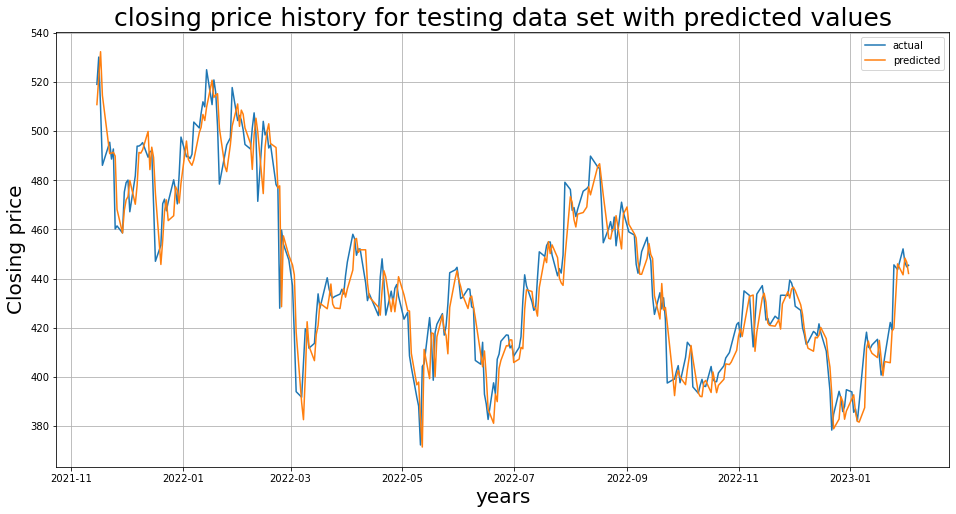

In [76]:
plt.figure(figsize=(16,8))
plt.plot(y_test,label='actual')
plt.plot(y_test.index,y_predict,label='predicted')
#plt.plot(y_test.index,ema9test, label='9EMA')
#plt.plot(y_test.index,ema50test, label='50EMA')
plt.grid()
plt.legend()
plt.xlabel('years',fontsize=20)
plt.ylabel('Closing price',fontsize=20)
plt.title('closing price history for testing data set with predicted values',fontsize=25)

In [77]:
#prediction signals for buying and selling in testing data set

In [78]:
X_test1=X_test.copy()
X_test1['Signal'] = np.where(X_test['EMA_9'] > X_test['EMA_50'], 1, 0)
X_test1['Position'] = X_test1['Signal'].diff()
X_test1['Buy'] = np.where(X_test1['Position'] == 1, y_test.values, np.NAN)
X_test1['Sell'] = np.where(X_test1['Position'] == -1, y_test.values, np.NAN)

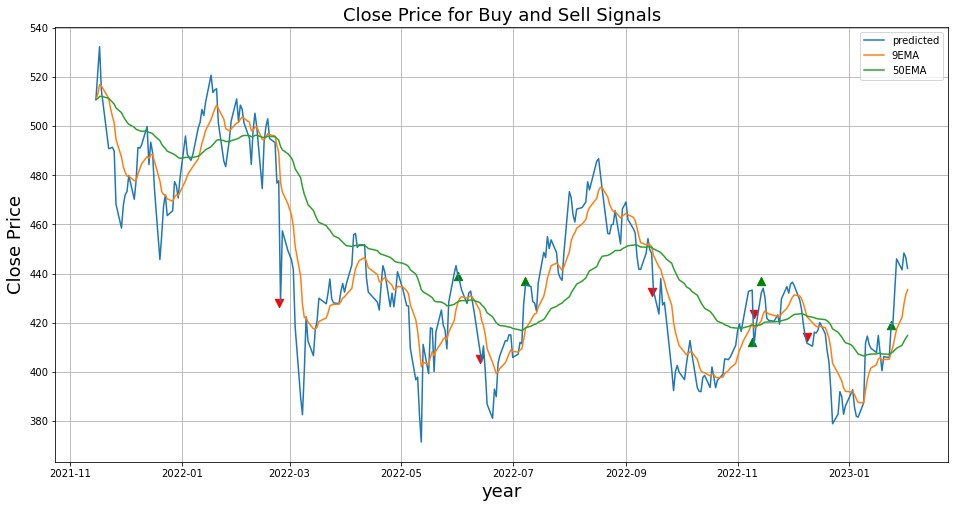

In [79]:
# Visualize the close price with EMA also Buy and Sell Signals
plt.figure(figsize=(16,8))
#plt.plot(y_test,label='actual')
plt.plot(y_test.index,y_predict,label='predicted')
plt.plot(y_test.index,ema9test, label='9EMA')
plt.plot(y_test.index,ema50test, label='50EMA')
plt.grid()
plt.legend()
plt.title('Close Price for Buy and Sell Signals', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.xlabel('year', fontsize=18)

# Make buy or sell signal
plt.scatter(X_test.index, X_test1['Buy'], label='Buy Signal', marker='^', color='green',s=70)
plt.scatter(X_test.index, X_test1['Sell'], label='Sell Signal', marker='v', color='red',s=70)

# Show the graph
plt.show()